In [119]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt
import astropy.io.fits as fits

import glob

import os

from photutils.aperture import EllipticalAperture
from photutils.aperture import EllipticalAnnulus
from photutils import aperture_photometry

from matplotlib.colors import LogNorm

In [120]:
filepath = glob.glob('./obsdata/night2/2018_06_29/dc/dc_*.fits')

In [121]:
# need a quick bias:

bd = fits.getdata('./obsdata/night2/2018_06_29/f_b/bias_001.fits')

In [122]:
data_array = []
header_array = []

for file in filepath:

    hdu = fits.open(file)
    data_array.append(hdu[0].data.copy())
    header_array.append(hdu[0].header.copy())
    print(os.path.basename(file))

hdu.close()
header_array[0]

dc_10.fits
dc_11.fits
dc_12.fits
dc_13.fits
dc_14.fits
dc_15.fits
dc_16.fits
dc_17.fits
dc_18.fits
dc_19.fits
dc_20.fits
dc_21.fits
dc_22.fits
dc_23.fits
dc_24.fits
dc_25.fits
dc_26.fits
dc_5.fits
dc_6.fits
dc_7.fits
dc_8.fits
dc_9.fits


SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  512                                                  
NAXIS2  =                  512                                                  
DATE-OBS= '2018-06-29T22:19:10' / Time at start of exposure                     
UT      = '22:19:10'           / UT time at start of exposure                   
OBSERVAT= 'mro     '           / per the iraf list                              
IMAGETYP= 'dark    '                                                            
FILTER  = ''                                                                    
BINX    =                    2 / Horizontal Binning                             
BINY    =                    2 / Vertical Binning                               
EXPTIME =                300

In [123]:
unbiased = []
expzeite = []

for file,spud in zip(data_array,header_array):
    no_b = file-np.median(bd)
    median = np.mean(no_b)
    what_were_your_times = spud['EXPTIME']
    unbiased.append(median)
    expzeite.append(what_were_your_times)

In [124]:
plt.style.use('ggplot')

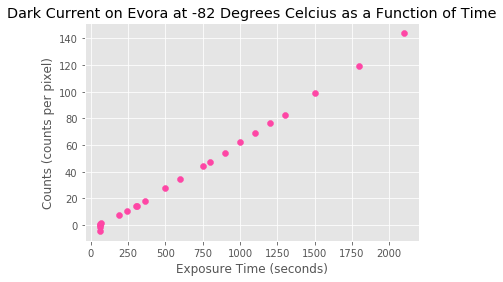

In [125]:
plt.scatter(np.array(expzeite), np.array(unbiased), c='xkcd:Barbie Pink') # Imagination, life is your creation!
plt.xlabel('Exposure Time (seconds)')
plt.ylabel('Counts (counts per pixel)')
plt.title('Dark Current on Evora at -82 Degrees Celcius as a Function of Time');

In [126]:
expt = np.array(expzeite) 
dc = np.array(unbiased)

In [127]:
from numpy.polynomial.polynomial import polyfit

In [128]:
b,m = polyfit(expt,dc, deg=1)

In [129]:
b

-6.300762016229558


    Figure Whatever: A linear fit of the dark current as a function of exposure time. The slope, or cou
    nts per second, is 0.07, and the y-intercept, or 0-second dark current, is -6.30, a number that
    doesn't make sense so we'll round it off to 0. Also, up until 35 minutes (2100 seconds), it can be reasonably
    approximated as linear.
    


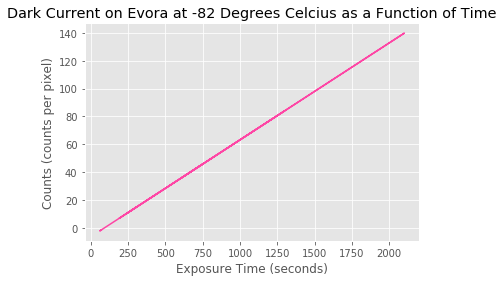

In [130]:
plt.plot(expt, m*expt+b, color='xkcd:Barbie Pink') # Come on Barbie, let's go party!
plt.xlabel('Exposure Time (seconds)')
plt.ylabel('Counts (counts per pixel)')
plt.title('Dark Current on Evora at -82 Degrees Celcius as a Function of Time');

print(
    '''
    Figure Whatever: A linear fit of the dark current as a function of exposure time. The slope, or cou
    nts per second, is {0:.2f}, and the y-intercept, or 0-second dark current, is {1:.2f}, a number that
    doesn't make sense so we'll round it off to 0. Also, up until 35 minutes (2100 seconds), it can be reasonably
    approximated as linear.
    '''.format(m,b)
)

In [131]:
'That makes it {0:.2f} counts per minute.'.format(60*m)

'That makes it 4.17 counts per minute.'

# Oh, and come to think of it, it might make sense to look one of the images:

In [132]:
plt.style.use('default')

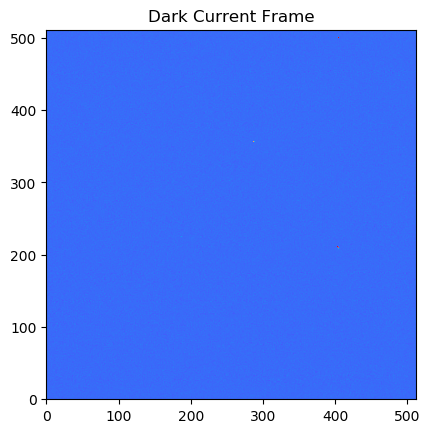

In [133]:
plt.imshow(data_array[20], norm=LogNorm(vmin=200), origin='lower', cmap='rainbow')
plt.title('Dark Current Frame');

### Can't see any overdensity initially, not just by looking at any rate.

In [134]:
data_array[20][1].shape

(512,)

### Here's a Histogram:

In [135]:
plt.style.use('ggplot')

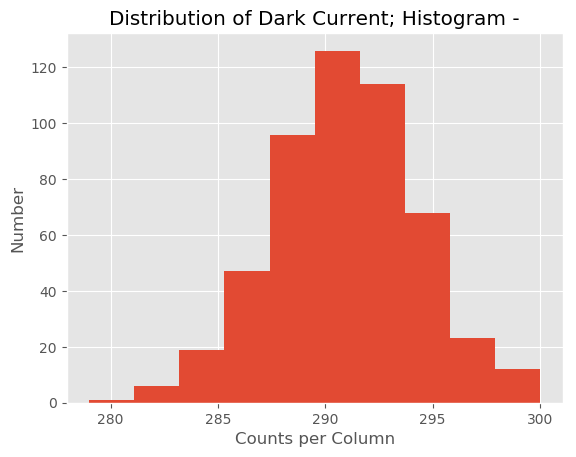

In [136]:
plt.hist(data_array[20][1])
plt.xlabel('Counts per Column')
plt.ylabel('Number')
plt.title('Distribution of Dark Current; Histogram -');

### Basically the distribution you'd expect, which bodes well for us having done things right.

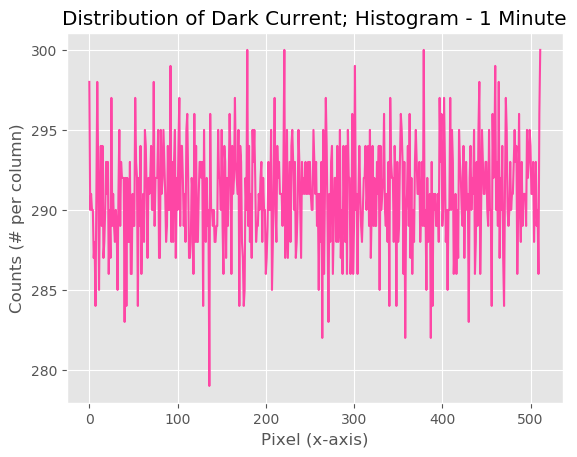

In [137]:
plt.plot(data_array[20][1], color='xkcd:Barbie Pink') # Back in plastic, it's fantastic!
plt.xlabel('Pixel (x-axis)')
plt.ylabel('Counts (# per column)')
plt.title('Distribution of Dark Current; Histogram - 1 Minute');

In [138]:
# First half or so of detector median count:
print(np.median(data_array[18][1][0:200]))

# Second half median count:
print(np.median(data_array[18][1][200:]))

289.0
289.0


### No increase in the region of 200-500 pixels that I can see. Trying a couple more, to see if it shows up at lower or higher exposure times:

In [139]:
header_array[15]['EXPTIME'] # looks good...

1100.0

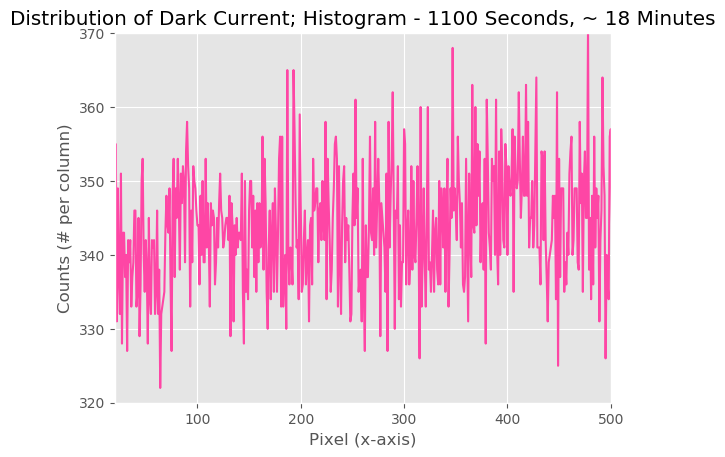

In [140]:
plt.plot(data_array[15][1], color='xkcd:Barbie Pink') # You can brush my hair, undress me everywhere!
plt.xlim(20,500)
plt.ylim(320,370)
plt.xlabel('Pixel (x-axis)')
plt.ylabel('Counts (# per column)')
plt.title('Distribution of Dark Current; Histogram - 1100 Seconds, ~ 18 Minutes');

### So now there is possibly a slight rise. Checking numerically:

In [141]:
# First half or so of detector median count:
print(np.median(data_array[15][1][20:200]))

# Second half median count:
print(np.median(data_array[15][1][200:]))

342.0
345.0


In [142]:
# First half or so of detector median count:
print(np.mean(data_array[15][1][20:200]))

# Second half median count:
print(np.mean(data_array[15][1][200:]))

342.21666666666664
344.9871794871795


### Not comfortable attributing that to a bias, so to speak, in the detector, as that isn't much of a difference. Checking more:

In [143]:
# Checking all:
first_half_counts = []
second_half_counts = []
for data in data_array:
    first_half_counts.append(np.median(data[1][20:200]))
    second_half_counts.append(np.median(data[1][200:]))

In [144]:
np.mean(first_half_counts)

322.45454545454544

In [145]:
np.mean(second_half_counts)

323.59090909090907

In [146]:
# Doesn't really show up as a general pattern. Guessing there's nothing to see for the shorter exp. times.

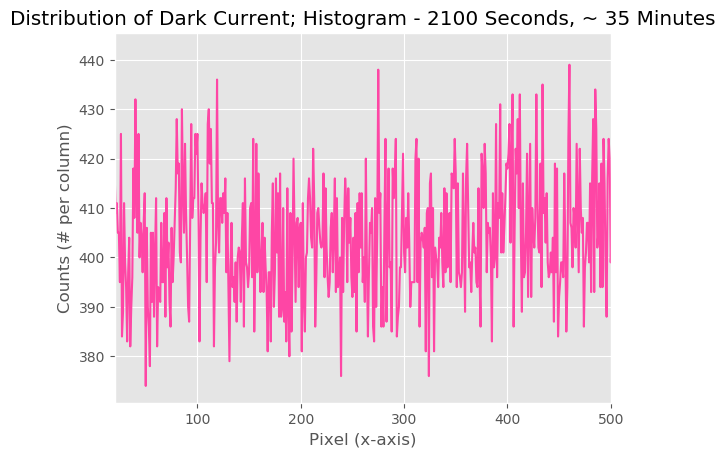

In [147]:
# Trying longest exp. time:

plt.plot(data_array[10][1], color='xkcd:Barbie Pink') # I'm a Barbie girl, in a Barbie world!
plt.xlim(20,500)
plt.xlabel('Pixel (x-axis)')
plt.ylabel('Counts (# per column)')
plt.title('Distribution of Dark Current; Histogram - 2100 Seconds, ~ 35 Minutes');

In [148]:
# First half or so of detector median count:
print(np.median(data_array[10][1][20:200]))

# Second half median count:
print(np.median(data_array[10][1][200:]))

403.5
405.0


## In conclusion: So the right half is consistently higher, but by a matter of 2 counts per column, and only for longer (> several minutes) exposures. It is also, as near as makes no difference, linear with regards to exposure time up to at least half an hour. Finally, the measured rate of dark current is 4.17 counts per pixel per minute, i.e., in the same general range as, but lower than, the posted rates on the MRO website.

## P.S. remember that all of this is for the CCD cooled to -81 degrees celcius. All bets are off for significantly higher or lower temps.